In [6]:
import numpy as np
import pandas as pd
import string 
import nltk
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt 

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
# importing the data
df=pd.read_csv('C:/Users/Administrator/Downloads/narendramodi_tweets.csv')
df.head(2)

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [8]:
# subset the column of review.text
text=df[['text']]
text.head()

,text
0,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...
2,RT @PMOIndia: Empowering the marginalised. htt...
3,RT @PMOIndia: Commitment to welfare of farmers...
4,RT @PMOIndia: Improving the quality of life fo...


In [9]:
# A very basic features we can extract is the number of words in each review.
text['count']=text['text'].apply(lambda x:len(str(x).split(' ')))
text.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,count
0,The President's address wonderfully encapsulat...,14
1,Rashtrapati Ji's address to both Houses of Par...,16
2,RT @PMOIndia: Empowering the marginalised. htt...,6
3,RT @PMOIndia: Commitment to welfare of farmers...,8
4,RT @PMOIndia: Improving the quality of life fo...,11


In [11]:
# cleaning the data-removing punctuation,numbers,converting everything to lower case
text['clean_text']=text['text'].str.lower().str.replace('[^a-z ]','')
print(text['clean_text'][0])

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards transformingindia


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
# removing the stop words
stop=list(stopwords.words('english'))
stop.extend(['rt','amp'])
def sw(text):
    text=[word for word in text.split() if word not in stop]
    # joining the list of words with space separator
    return ' '.join(text)
#text['split_words']=sw(text['clean_text'])
text['split_words']= text['clean_text'].apply(sw)
text.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,text,count,clean_text,split_words
0,The President's address wonderfully encapsulat...,14,the presidents address wonderfully encapsulate...,presidents address wonderfully encapsulated in...
1,Rashtrapati Ji's address to both Houses of Par...,16,rashtrapati jis address to both houses of parl...,rashtrapati jis address houses parliament inde...
2,RT @PMOIndia: Empowering the marginalised. htt...,6,rt pmoindia empowering the marginalised httpst...,pmoindia empowering marginalised httpstcowwsqgwdk
3,RT @PMOIndia: Commitment to welfare of farmers...,8,rt pmoindia commitment to welfare of farmers h...,pmoindia commitment welfare farmers httpstcopa...
4,RT @PMOIndia: Improving the quality of life fo...,11,rt pmoindia improving the quality of life for ...,pmoindia improving quality life poor httpstcou...


In [51]:
count_vectorizer=CountVectorizer()

In [54]:
# fit the count vectorizer using the text data
count_vectorizer.fit(text['split_words'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [60]:
# learn a vocabulary of all tokens in the raw documents - using fit on cv
dictionary=count_vectorizer.vocabulary_.items()
dictionary

dict_items([('presidents', 6529), ('address', 86), ('wonderfully', 8641), ('encapsulated', 1939), ('indias', 4673), ('strengths', 7726), ('aspirations', 415), ('potential', 6452), ('efforts', 1871), ('towards', 8112), ('transformingindia', 8145), ('rashtrapati', 6795), ('jis', 4950), ('houses', 2799), ('parliament', 6190), ('indepth', 4608), ('extensive', 2127), ('hear', 2684), ('httpstcordkqtjgnnx', 3890), ('rashtrapatibhvn', 6796), ('pmoindia', 6391), ('empowering', 1932), ('marginalised', 5501), ('httpstcowwsqgwdk', 4259), ('commitment', 1169), ('welfare', 8583), ('farmers', 2169), ('httpstcopaafrfmrc', 3776), ('improving', 4563), ('quality', 6676), ('life', 5275), ('poor', 6421), ('httpstcougmvkz', 4096), ('financial', 2244), ('inclusion', 4584), ('poverty', 6455), ('alleviation', 214), ('httpstcoxtzyhhte', 4321), ('fourdecade', 2338), ('old', 6064), ('demand', 1534), ('onerankonepension', 6075), ('orop', 6121), ('armed', 363), ('forces', 2306), ('veterans', 8435), ('fulfilled', 23

In [56]:
# learn the vocabulary dictinary and return documents term matrix-fir transform
# creating DTM
x=count_vectorizer.fit_transform(text['split_words'])
x

<3220x8760 sparse matrix of type '<class 'numpy.int64'>'
	with 31728 stored elements in Compressed Sparse Row format>

In [58]:
# visualise the elements of sparse matrix by converting it to an array
DTM=pd.DataFrame(x.toarray(),columns=count_vectorizer.get_feature_names())
DTM.head()

,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawas,aazadisaal,abdel,...,zaidi,zayed,zeal,zero,zhejiang,ziara,zimbabwe,zone,zones,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
## get the word and its respective frequency for the whole document 
DTM.sum().head()


aabhar       1
aadhaar      6
aadhar       1
aajtak       1
aamirkhan    1
dtype: int64

In [61]:
# word and the frequency
word_count_freq=DTM.sum()
# word_count_freq.sort_values(ascending=False)
word_table=pd.DataFrame(word_count_freq).reset_index()
word_table=word_table.rename(columns={'index':'word',0:'Freq'})
word_table.sort_values(by='Freq',ascending=False).head(10)

,word,Freq
4613,india,366
6268,people,204
6384,pm,169
6391,pmoindia,145
8350,us,143
8070,today,136
5857,narendramodi,127
8035,ties,127
8626,wishes,119
7982,thank,119


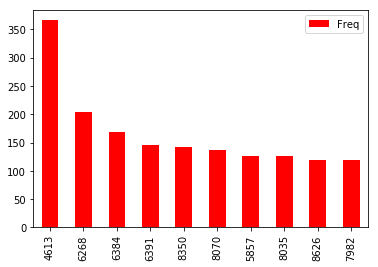

In [73]:
word_table.sort_values(by='Freq',ascending=False).head(10).plot.bar(color='red')

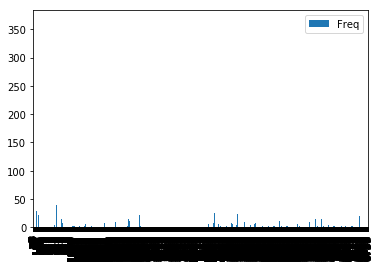

## Anova

Bvariate analysis-categorical vs numerical column

In [76]:
# we will use the inbuild data set from pydataset
from pydataset import data
df=data('chickwts')
df.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [77]:
df.shape

(71, 2)

In [78]:
df['feed'].unique()

array(['horsebean', 'linseed', 'soybean', 'sunflower', 'meatmeal',
       'casein'], dtype=object)

In [79]:
df['feed'].nunique()

6

In [84]:
x=df.groupby(['feed']).size().reset_index()
x

,feed,0
0,casein,12
1,horsebean,10
2,linseed,12
3,meatmeal,11
4,soybean,14
5,sunflower,12


In [86]:
df.groupby(['feed'])['weight'].mean().reset_index()

,feed,weight
0,casein,323.583333
1,horsebean,160.200000
2,linseed,218.750000
3,meatmeal,276.909091
4,soybean,246.428571
5,sunflower,328.916667


In [87]:
# lets create a null and alternate hypothesis
#H0: feed has no impact on weight
#H1:feed does impact weight
# input to the anova function is the pandas series of different sample
# lets create pandas series for each group by following below steps
# step1:creating pandas series of weight for each group
casein=df['weight'][df['feed']=='casein']
horsebean=df['weight'][df['feed']=='horsebean']
linseed=df['weight'][df['feed']=='linseed']
meatmeal=df['weight'][df['feed']=='meatmeal']
soybean=df['weight'][df['feed']=='soybean']
sunflower=df['weight'][df['feed']=='sunflower']


In [88]:
import scipy.stats as stats
stats.f_oneway(casein,horsebean,linseed,meatmeal,soybean,sunflower)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

As p value is very low so we reject the null hypothesis which means feed have impact on weight

In [118]:
casein=casein.reset_index().drop(columns=['index'])
horsebean=horsebean.reset_index().drop(columns=['index'])
lineseed=linseed.reset_index().drop(columns=['index'])
meatmeal=meatmeal.reset_index().drop(columns=['index'])
soybean=soybean.reset_index().drop(columns=['index'])
sunflower=sunflower.reset_index().drop(columns=['index'])

In [126]:
master=pd.concat([casein,horsebean,lineseed,meatmeal,soybean,sunflower],axis=1)
master.columns=['casein','horsebean','lineseed','meatmeal','soybean','sunflower']

In [ ]:
horsebean.reset_index(inplace=True)
linseed.reset_index(inplace=True)
meatmeal.reset_index(inplace=True)
soybean.reset_index(inplace=True)
sunflower.reset_index(inplace=True)


In [128]:
master

,casein,horsebean,lineseed,meatmeal,soybean,sunflower
0,368.0,179.0,309.0,325.0,243,423.0
1,390.0,160.0,229.0,257.0,230,340.0
2,379.0,136.0,181.0,303.0,248,392.0
3,260.0,227.0,141.0,315.0,327,339.0
4,404.0,217.0,260.0,380.0,329,341.0
5,318.0,168.0,203.0,153.0,250,226.0
6,352.0,108.0,148.0,263.0,193,320.0
7,359.0,124.0,169.0,242.0,271,295.0
8,216.0,143.0,213.0,206.0,316,334.0
9,222.0,140.0,257.0,344.0,267,322.0


In [130]:
master.to_csv('chickwts.csv')

## Bivariate analysis -categorical vs categorical -chisquare test
there are two main kinds of chi square tests:1) the test of independence ,which ask a question of relationship,such as ,is there a relationship between 
    gender and sat scores,2)vthe goodness of -fit test,which asks something like 'if a coin is tossed 100 times will it come up heads 50 times and tails 50 times'

* problem statement: test the hypothesis wheather the students somking habit is independent of their exercise level
    
* H0: smoking habit is independent of exercise level H1: smoking habit is depend on exercise level

In [131]:
# lets import the data set
from pydataset import data
survey=data('survey')
survey.shape

(237, 12)

In [184]:
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [132]:
# lets explore a bit more about smoking and exercise 
## cat -cat-Table-pd.crosstab
import pandas as pd
tble=pd.crosstab(index=survey['Smoke'],columns=survey['Exer'])
tble

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [134]:
from scipy.stats import chi2_contingency
chi2_contingency(tble)

(5.488545890584232,
 0.48284216946545633,
 6,
 array([[ 5.36016949,  1.0720339 ,  4.56779661],
        [92.09745763, 18.41949153, 78.48305085],
        [ 9.25847458,  1.85169492,  7.88983051],
        [ 8.28389831,  1.65677966,  7.05932203]]))

  interpreting the result:
 * 1) the first value(5.488) is the chi-square statistic -test that measures how expectations compare to actual observed values.
 * 2) the second value is the p-values-0.4828
 * 3) the 3rd is th values of degree of freedom
 * 4) finally the array at the end of the output is the contingency table with expected values based on all of our samples
 

Bivariate ananlysis- categorical vs categorical -grouped bar chart and stacked bar chart Comparing two categorical column based on 
numerical value

In [136]:
import pandas as pd
tble=pd.crosstab(index=survey['Smoke'],columns=survey['Exer'])
tble

Exer,Freq,None,Some
Smoke,,,
Heavy,7,1,3
Never,87,18,84
Occas,12,3,4
Regul,9,1,7


In [137]:
# lets plot the average age for each smoker and exercise person
mean_age=survey.groupby(['Smoke','Exer'])['Age'].mean().reset_index()
mean_age.shape

(12, 3)

In [186]:
mean_age.head()

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000


In [138]:
## converting from a long data-Wide data=> Pivot 
mean_age.T

,0,1,2,3,4,5,6,7,8,9,10,11
Smoke,Heavy,Heavy,Heavy,Never,Never,Never,Occas,Occas,Occas,Regul,Regul,Regul
Exer,Freq,None,Some,Freq,None,Some,Freq,None,Some,Freq,None,Some
Age,22.7737,20.917,18.3337,20.1514,21.176,20.1796,19.4653,25.8057,18.8753,21.5,17.583,21.1549


In [139]:
df=mean_age.pivot('Smoke','Exer','Age')
df.head()

Exer,Freq,None,Some
Smoke,,,
Heavy,22.773714,20.917000,18.333667
Never,20.151379,21.176000,20.179607
Occas,19.465250,25.805667,18.875250
Regul,21.500000,17.583000,21.154857


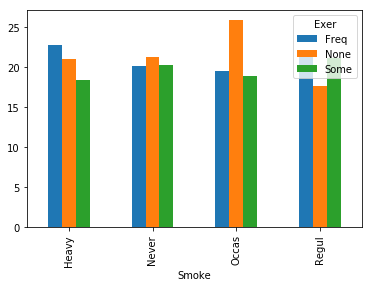

In [141]:
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(kind='bar')

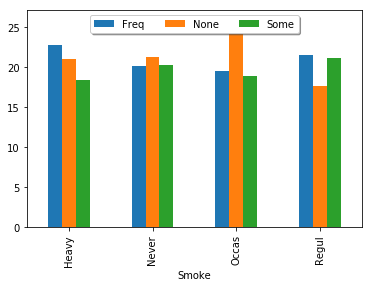

In [157]:
# pandas will show grouped bars by columns
# entries in each row but different columns will constitute a group in the resulting plot
#hence you need to reshape your dataframe to have the group as columns. in this case you can pivot like
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(kind='bar')
ax=plt.subplot(111)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.00),ncol=4,fancybox=True,shadow=True)
plt.show()

In [155]:
?plt.legend

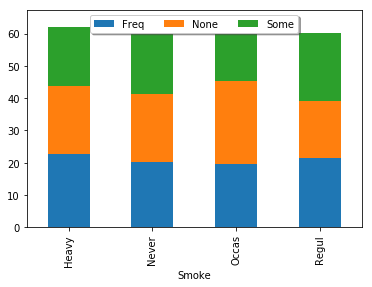

In [160]:
%matplotlib inline
from matplotlib import pyplot as plt
df.plot(kind='bar',stacked=True)
ax=plt.subplot(111)
ax.legend(loc='upper center',bbox_to_anchor=(0.5,1.00),ncol=4,fancybox=True,shadow=True)
plt.show()

Data Cleaning-handling missing value
there are two types of missing data:1)MCAR: missing completely at random.this is the desirable scenario in case of missing data.
2) MNAR:missing not at random.missing not a random data is a more serious issue and in this case it might be wise to check the data 
    gathering process further and try to understand why the information is missing.for instance ,if most of the people in a survey did not 
    answer a certain question,why did they do that?was the question unclear?

In [7]:
election=pd.read_excel('C:/Users/Administrator/Downloads/Election data base.xlsx')
election.shape

(327294, 11)

In [8]:
# we can see lot of missing values.lets check the number rows in each column 
# having missing value
null_value=election.isnull().sum()
print(null_value)
# lets find the percentage of missing values in each column
percent_missing=(null_value/len(election.index))*100
percent_missing

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         1
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64


st_name       0.000000
year          0.000000
ac_no         0.000000
ac_name       4.913931
ac_type       0.000000
cand_name     0.000306
cand_sex      1.619950
partyname     0.000000
partyabbre    0.826780
totvotpoll    0.002139
electors      0.000000
dtype: float64

In [9]:
?sns.heatmap

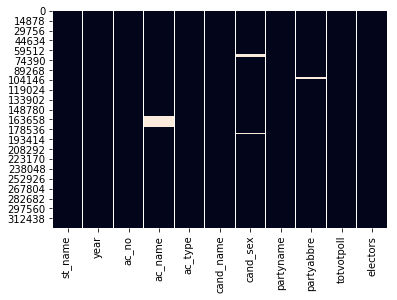

In [10]:
# we can also use plot the data to find which column have more missing values
# visualization the patterns of missing value occurances
import seaborn as sns 
from matplotlib import pyplot as plt
sns.heatmap(election.isnull(),cbar=False)

Missing Value treatement-we can do following with missing values
1) we can replace them-a) by zero b) by a specific value c) by the mean or median of the specific column d) replace them by forward 
them fill e) replace them by back fill
2) we can drop them-a) by dropping all the rows containing missing values b) by dropping all the columns containing missing values
3)imputation of missing values by algorithmn like KNN and MICE

In [11]:
# Replacing the missing value
# a) by zero or a specific value
election['totvot_zero_fill']=election['totvotpoll'].fillna(0)
election.isnull().sum()

st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
dtype: int64

In [12]:
# b) by mean / median of the totvotpoll
totvotpoll_mean=election['totvotpoll'].mean()
totvotpoll_mean

9299.67342118691

In [15]:
election['totvotpoll_fill']=election['totvotpoll'].fillna(totvotpoll_mean)

In [14]:
# lets check the impact of imputing missing value by mean
# lets take the state of sikkim as the columns have missing value under totvotpoll
sikkim_data=election[election['st_name']=='Sikkim']
# lets check the missing values which are in year 2004
sikkim_data_missing=sikkim_data[sikkim_data['year']==2004]
sikkim_data_missing


,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,totvot_zero_fill,totvotpoll_fill
229199,Sikkim,2004.0,1,Yoksam,GEN,Akar Dhoj Limbu,M,Sikkim Himali Rajya Parishad,SHRP,107.0,8035,107.0,107.000000
229200,Sikkim,2004.0,1,Yoksam,GEN,Mangal Bir Subba,M,Indian National Congress,INC,2427.0,8035,2427.0,2427.000000
229201,Sikkim,2004.0,1,Yoksam,GEN,Kalawati Subba,F,Sikkim Democratic Front,SDF,3947.0,8035,3947.0,3947.000000
229202,Sikkim,2004.0,2,Tashiding,BL,Pulling Lepcha,M,Independent,IND,85.0,6365,85.0,85.000000
229203,Sikkim,2004.0,2,Tashiding,BL,Sonam Dadul Kazi,M,Indian National Congress,INC,1778.0,6365,1778.0,1778.000000
229204,Sikkim,2004.0,2,Tashiding,BL,Dawa Narbu Takarpa,M,Sikkim Democratic Front,SDF,3509.0,6365,3509.0,3509.000000
229205,Sikkim,2004.0,3,Geyzing,GEN,Chandra Bahadur Katwal,M,Independent,IND,64.0,8574,64.0,64.000000
229206,Sikkim,2004.0,3,Geyzing,GEN,Dhan Bahadur Gurung,M,Independent,IND,69.0,8574,69.0,69.000000
229207,Sikkim,2004.0,3,Geyzing,GEN,Dal Bdr. Gurung,M,Indian National Congress,INC,2410.0,8574,2410.0,2410.000000
229208,Sikkim,2004.0,3,Geyzing,GEN,Sher Bahadur Subedi,M,Sikkim Democratic Front,SDF,4227.0,8574,4227.0,4227.000000


In [18]:
# lets plot the total vote year wise 
totvotpoll_line=sikkim_data.groupby(['year'])['totvotpoll'].sum().reset_index()
print(totvotpoll_line)

# lets get the same for the column where we have imputed the mean values
totvotpoll_mean_fill_line=sikkim_data.groupby(['year'])['totvot_zero_fill'].sum().reset_index()
totvotpoll_mean_fill_line

     year  totvotpoll
0  1979.0     72339.0
1  1985.0     97057.0
2  1989.0    133619.0
3  1994.0    173457.0
4  1999.0    204927.0
5  2004.0    196465.0
6  2009.0    251851.0
7  2014.0    308881.0


,year,totvot_zero_fill
0,1979.0,72339.0
1,1985.0,97057.0
2,1989.0,133619.0
3,1994.0,173457.0
4,1999.0,204927.0
5,2004.0,196465.0
6,2009.0,251851.0
7,2014.0,308881.0


ValueError: Unrecognized character t in format string

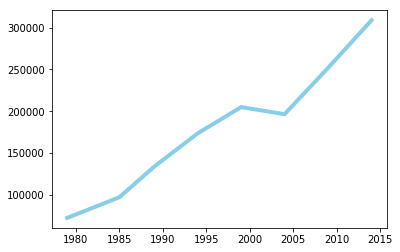

In [180]:
# lets plot these two line chart 
plt.plot('year','totvotpoll',data=totvotpoll_line,color='skyblue',linewidth=4)
plt.plot('year','totvotpoll_mean_fill',data=totvotpoll_mean_fill_line,color='olive',linewidth=2)
plt.legend()
plt.show()


In [181]:
#d) replace them by forward fill or back fill
election['Forward_fill']=election['totvotpoll'].fillna(method='ffill')
election.isnull().sum()
# lets check how forward fill work

st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
totvotpoll_fill         0
Forward_fill            0
dtype: int64

In [182]:
election['Forward_fill']=election['totvotpoll'].fillna(method='bfill')
election.isnull().sum()

st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
totvotpoll_fill         0
Forward_fill            0
dtype: int64